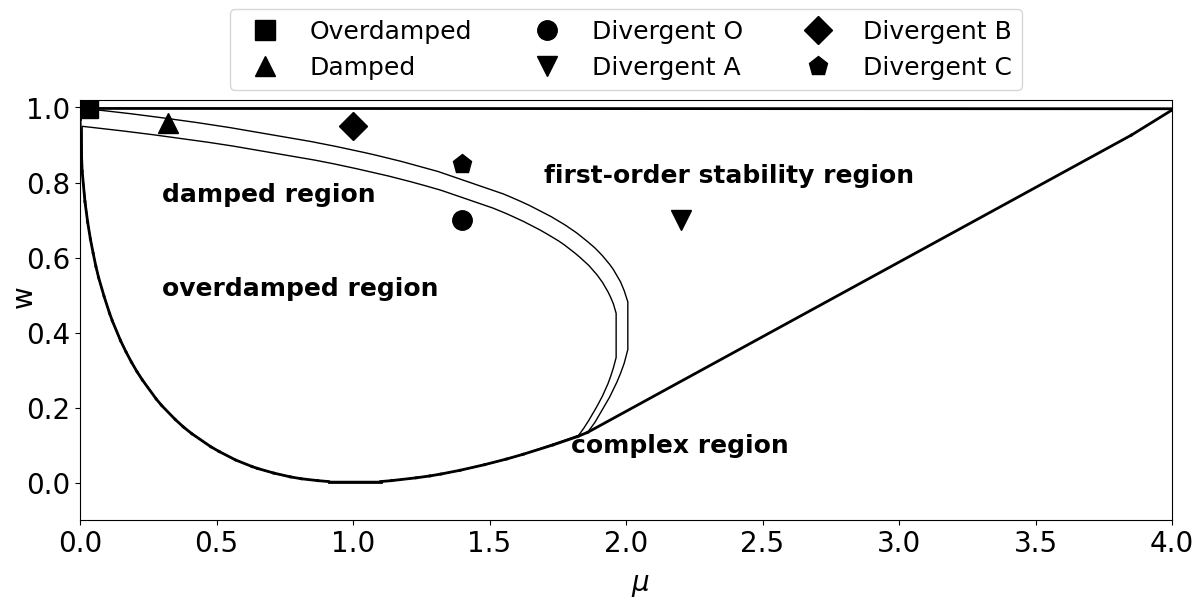

In [1]:

# -*- coding: utf-8 -*-
"""
Created on Thu Apr 25 11:55:13 2024

@author: bzfkostr
"""

import numpy as np
import matplotlib.pyplot as plt
from scipy.spatial import ConvexHull
import matplotlib.patches as patches
from scipy.spatial import ConvexHull
import matplotlib.patches as patches

# Function to order points using ConvexHull
def get_ordered_points(points):
    hull = ConvexHull(points)
    return points[hull.vertices]

def Divergent():
    
    w=1
    mu=0.03
    
    return w, mu

def Damped():

    mu=0.3215
    w=0.958058
    
    return w, mu

def Overdamped():
    
    w=0.7
    mu=1.4
    
    return w, mu



def C():
    
    w=0.85
    mu=1.4
    
    return w, mu

def A():

    mu=2.2
    w=0.7
    
    return w, mu

def B():
    
    w=0.95
    mu=1
    
    return w, mu


w_divergent, mu_divergent=Divergent()
w_damped, mu_damped=Damped()
w_overdamped, mu_overdamped=Overdamped()

w_A, mu_A=A()
w_B, mu_B=B()
w_C, mu_C=C()

Names=['Overdamped', 'Damped', 'Divergent O', 'Divergent A', 'Divergent B', 'Divergent C']
Markers=['s', '^', 'o','v', 'D', 'p' ]
Parameters=[[w_divergent, mu_divergent],[w_damped, mu_damped],[w_overdamped, mu_overdamped],[w_A, mu_A],[w_B, mu_B],[w_C, mu_C]]
#%%



def fct_abs(c): # complex absolute value
    r=c.real
    i=c.imag
    return np.sqrt(r**2+i**2)

discr=100
Mu = np.linspace(0.01, 3.99, discr)
W = np.linspace(-1, 1.1, discr)
WMuB = np.zeros((discr, discr))
WMuA = np.zeros((discr, discr))



#%% get BD Overdamped and Damped

def f_damped(mu, w):
    M = np.array([[ (1+w)**2-4*mu/2*(1+w)+2*(mu**2)/3+2*(mu/2)**2,  2*w*(2*(mu/2)-(1+w)),w**2],
            [(1+w)-mu,-w,0],
            [1,0,0]])
    ev, ew = np.linalg.eig(M)
    
    NormEv = np.zeros(len(ev))
    for i in range(len(ev)):
        NormEv[i] = fct_abs(ev[i])
        
    rhoB=np.max(NormEv)
    
    return rhoB
        

def complex_check(mu,w):
    
    return (1+w-mu)**2 -4*w
    
 
def diverget(mu,w):
    
    return mu-(12*(1-w**2))/(7-5*w)

def radiusA(mu,w):
    
    return mu-2*(w+1)
    

#%% damped 
BDDamped=[]
BDDivergent=[]
discr=300

Mu = np.linspace(0, 4, discr)
W = np.linspace(0, 1, discr)
for mu in Mu:
    for w in W:
        c=complex_check(mu,w)
        if c<0.001: # complex
            div=diverget(mu,w)
            if div<0: # second order stable
                rhoB=f_damped(mu, w)
                if 0.945<rhoB<0.951: # inner damoed boundary
                    BDDamped.append([mu,w])
                
                if 0.99<rhoB<1:  # outer band coudnary
                    BDDamped.append([mu,w])
                
                if 0.99<rhoB<1:  # outer band coudnary
                    BDDivergent.append([mu,w])
                
                

#%% Overdamped 
BDOverdamped=[]
discr=400

Mu = np.linspace(-0.002, 4, discr)
W = np.linspace(0, 1, discr)
for mu in Mu:
    for w in W:
        rhoA=radiusA(mu,w)
        c=complex_check(mu,w)
        rhoB=f_damped(mu, w)
        if c<0:
            
            if 0.945<rhoB<0.951:  # same boundary to damped
                BDOverdamped.append([mu,w])
                
    
            
        if rhoB<0.95 and -0.01<c<0: # boundary to complex
            BDOverdamped.append([mu,w])

        if -0.01<c<0 and mu<1.7:
            BDDamped.append([mu,w])
        
        if 0.99<w<1 and rhoB<=1: # boundary to periodic
            BDOverdamped.append([mu,w])
            BDDivergent.append([mu,w])
            

#%% Divergent 



discr=300
Mu = np.linspace(1.98, 4, discr)
W = np.linspace(0, 1, discr)
for mu in Mu:
    for w in W:   
        c=complex_check(mu,w)
        #rhoA=radiusA(mu,w)
        if -0.01<c<0:    # boundary to not first order stable
            
            BDDivergent.append([mu,w])  
discr=300
Mu = np.linspace(0, 4, discr)
W = np.linspace(0, 1, discr)  
for mu in Mu:
    for w in W:          
        if 0.99<w<1 : # boundary to periodic
            
            BDDivergent.append([mu,w])
            
#%% plot points BDOverdamped, BDDamped, BDDivergent

BDOverdamped = np.array(BDOverdamped)
BDDamped = np.array(BDDamped)
BDDivergent = np.array(BDDivergent)

# pick one point from BDOverdamped


#%%
import itertools

def distance(point1, point2):
    """Calculate the Euclidean distance between two points."""
    return ((point1[0] - point2[0])**2 + (point1[1] - point2[1])**2) ** 0.5

def total_distance(points_order, points):
    """Calculate the total distance of a path."""
    total = 0
    for i in range(len(points_order) - 1):
        total += distance(points[points_order[i]], points[points_order[i + 1]])
    total += distance(points[points_order[-1]], points[points_order[0]])  # Return to the starting point
    return total

def nearest_neighbor(points, threshold):
    """Solve the Traveling Salesman Problem using nearest neighbor algorithm with a distance threshold."""
    n = len(points)
    unvisited = set(range(1, n))
    current_point = 0
    path = [current_point]
    total_distance = 0
    
    while unvisited:
        min_distance = float('inf')
        nearest_point = None
        
        for neighbor in unvisited:
            dist = distance(points[current_point], points[neighbor])
            if dist <= threshold and dist < min_distance:
                min_distance = dist
                nearest_point = neighbor
        
        if nearest_point is None:
            break  # No valid neighbor found within the threshold
        
        path.append(nearest_point)
        total_distance += min_distance
        unvisited.remove(nearest_point)
        current_point = nearest_point
    
    total_distance += distance(points[current_point], points[0])  # Return to the starting point
    path.append(0)
    
    return total_distance, path

# Example usage:
points = [(0, 0), (1, 2), (3, 1), (4, 4)]  # Example points
min_dist, best_path = nearest_neighbor(points, 0.5)


#%%
BDOverdamped = BDOverdamped[BDOverdamped[:,0].argsort()]
BDamped = BDDamped[BDDamped[:,0].argsort()]
BDDivergent= BDDivergent[BDDivergent[:,0].argsort()]

BDOverdamped = BDOverdamped[BDOverdamped[:,1].argsort()]
BDamped = BDDamped[BDDamped[:,1].argsort()]
BDDivergent= BDDivergent[BDDivergent[:,1].argsort()]


min_dist, best_path_damped = nearest_neighbor(BDDamped, 0.3)
best_points_damped = [BDDamped[i] for i in best_path_damped]

min_dist, best_path_overdamped = nearest_neighbor(BDOverdamped, 0.3)
best_points_overdamped = [BDOverdamped[i] for i in best_path_overdamped]

min_dist, best_path_divergent = nearest_neighbor(BDDivergent, 0.25)
best_points_divergent = [BDDivergent[i] for i in best_path_divergent]

best_points_damped= np.array(best_points_damped)
best_points_overdamped = np.array(best_points_overdamped)
best_points_divergent = np.array(best_points_divergent)



# Get ordered points for each region
best_points_damped = np.array(best_points_damped)
best_points_overdamped = np.array(best_points_overdamped)
best_points_divergent = np.array(best_points_divergent)

ordered_points_damped = get_ordered_points(best_points_damped)
ordered_points_overdamped = get_ordered_points(best_points_overdamped)
ordered_points_divergent = get_ordered_points(best_points_divergent)

# remove form damped point

ordered_points_damped = np.delete(ordered_points_damped, np.s_[15:16], axis=0)


# Create polygons with ordered points
polygonDamped = patches.Polygon(ordered_points_damped, closed=True, fill=False, hatch='')
polygonOverdamped = patches.Polygon(ordered_points_overdamped, closed=True, fill=False, hatch='')
polygonDivergent = patches.Polygon(ordered_points_divergent, closed=True, fill=False, hatch='')

# Plot
fig, ax = plt.subplots(figsize=(14,7))

for p in range(len(Parameters)):
    plt.plot(Parameters[p][1], Parameters[p][0], marker=Markers[p], linestyle='None', markersize=14, color='black', label=Names[p])

plt.text(1.7, 0.8, 'first-order stability region', fontsize=18, color='black', weight='bold')
plt.text(1.8, 0.08, 'complex region', fontsize=18, color='black', weight='bold')
plt.text(0.3, 0.75, 'damped region', fontsize=18, color='black', weight='bold')
plt.text(0.3, 0.5, 'overdamped region', fontsize=18, color='black', weight='bold')

# Add labels for axes
fig.text(0.5, 0.15, r'$\mu$', ha='center', fontsize=20)
fig.text(0.05, 0.57, 'w', va='center', rotation='vertical', fontsize=20)

plt.legend(bbox_to_anchor=(0, 0.97, 1, 0.3), loc="center", ncol=3, prop={'size': 18}, markerscale=1)

plt.xticks(fontsize=20)
plt.yticks(fontsize=20)

# Adjust layout
plt.subplots_adjust(top=0.85, bottom=0.25, left=0.1, right=0.88)

# Add the polygons to the plot
ax.add_patch(polygonDamped)
ax.add_patch(polygonOverdamped)
#ax.add_patch(polygonDivergent)

# Draw the convex hull for all points combined
All = np.vstack([best_points_damped, best_points_overdamped, best_points_divergent])
hullF = ConvexHull(All)

for simplex in hullF.simplices:
    plt.plot(All[simplex, 0], All[simplex, 1], linewidth=2, color='black')

plt.xlim(0, 4)
plt.ylim(-0.1, 1.02)

# Save the figure
plt.savefig('Fig5.png', bbox_inches="tight")


